In [37]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [31]:
# Function to create model
def create_model(neurons=16, optimizer='adam'):
    model = Sequential([
        Dense(neurons, input_dim=X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [32]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0, neurons=8))
])

In [33]:
# Define hyperparameters grid
param_grid = {
    'clf__neurons': [8, 16, 32],
    'clf__optimizer': ['adam', 'rmsprop']
}

In [34]:
# Perform hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        KerasClassifier(batch_size=16, build_fn=<function create_model at 0x7d847c657f40>, epochs=10, neurons=8, verbose=0))]),
             param_grid={'clf__neurons': [8, 16, 32],
                         'clf__optimizer': ['adam', 'rmsprop']},
             scoring='accuracy', verbose=1)

In [35]:
# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'clf__neurons': 8, 'clf__optimizer': 'adam'}


In [36]:
# Evaluate model
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.289437585733882


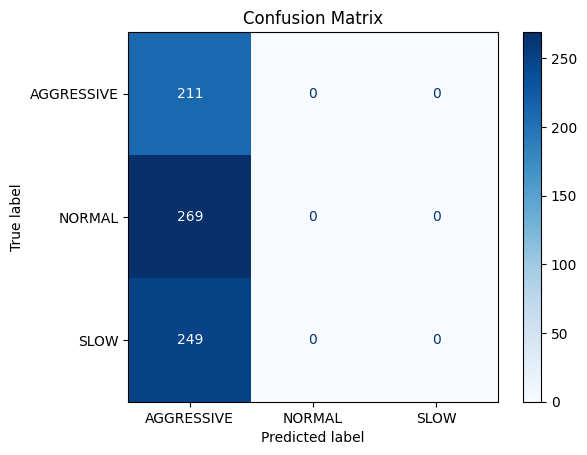

In [48]:
# Plot confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=best_model.classes_))

Classification Report:
              precision    recall  f1-score   support

  AGGRESSIVE       0.29      1.00      0.45       211
      NORMAL       0.00      0.00      0.00       269
        SLOW       0.00      0.00      0.00       249

    accuracy                           0.29       729
   macro avg       0.10      0.33      0.15       729
weighted avg       0.08      0.29      0.13       729



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
